# Overview

## Target:
    - Reduce the number of parameters
    - Add regularization techniques like Batch Normalization and Dropout to prevent overfitting

## Result:
    - Parameters : `12,100`
    - Best Training Accuracy : `99.15`
    - Best Test Accuracy : `99.11`

## Analysis:
    - The model is not overfitting, but we need to reduce the number of params, since our target is to make the model under `8k` Params
    - The Model seems to be generalizing well
    


In [1]:
import torch
import torch.optim as optim
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
from model import Model_2
from utils import train, test

%pip install torchsummary
from torchsummary import summary

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Note: you may need to restart the kernel to use updated packages.


In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Model_2().to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
           Dropout-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 30, 24, 24]           4,350
              ReLU-6           [-1, 30, 24, 24]               0
       BatchNorm2d-7           [-1, 30, 24, 24]              60
           Dropout-8           [-1, 30, 24, 24]               0
            Conv2d-9           [-1, 10, 22, 22]           2,710
             ReLU-10           [-1, 10, 22, 22]               0
      BatchNorm2d-11           [-1, 10, 22, 22]              20
          Dropout-12           [-1, 10, 22, 22]               0
        MaxPool2d-13           [-1, 10, 11, 11]               0
           Conv2d-14           [-1

In [3]:
torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)

In [4]:
model_2 = Model_2().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.1)
criterion = F.nll_loss

# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []
for epoch in range(1, 15):
    train_acc,train_losses = train(model, device, train_loader, optimizer, criterion, train_acc, train_losses)
    test_acc, test_losses = test(model, device, test_loader, criterion, test_acc, test_losses)
    if(epoch==12):
      scheduler.step()
    for param_group in optimizer.param_groups:
      print(param_group['lr'],epoch+1)

  0%|          | 0/469 [00:00<?, ?it/s]

Train: Loss=0.0666 Batch_id=468 Accuracy=85.40: 100%|██████████| 469/469 [00:37<00:00, 12.67it/s]


Train set: Accuracy: 85.40%
Test set: Accuracy: 96.95%
0.01 2


Train: Loss=0.0656 Batch_id=468 Accuracy=97.18: 100%|██████████| 469/469 [00:34<00:00, 13.61it/s]


Train set: Accuracy: 97.18%
Test set: Accuracy: 97.97%
0.01 3


Train: Loss=0.0932 Batch_id=468 Accuracy=97.83: 100%|██████████| 469/469 [00:34<00:00, 13.77it/s]


Train set: Accuracy: 97.83%
Test set: Accuracy: 98.78%
0.01 4


Train: Loss=0.0438 Batch_id=468 Accuracy=98.19: 100%|██████████| 469/469 [07:48<00:00,  1.00it/s]


Train set: Accuracy: 98.19%
Test set: Accuracy: 98.74%
0.01 5


Train: Loss=0.0348 Batch_id=468 Accuracy=98.33: 100%|██████████| 469/469 [00:24<00:00, 18.96it/s]


Train set: Accuracy: 98.33%
Test set: Accuracy: 98.67%
0.01 6


Train: Loss=0.1037 Batch_id=468 Accuracy=98.57: 100%|██████████| 469/469 [00:19<00:00, 24.41it/s]


Train set: Accuracy: 98.57%
Test set: Accuracy: 98.72%
0.01 7


Train: Loss=0.0535 Batch_id=468 Accuracy=98.58: 100%|██████████| 469/469 [00:19<00:00, 24.11it/s]


Train set: Accuracy: 98.58%
Test set: Accuracy: 98.81%
0.01 8


Train: Loss=0.0250 Batch_id=468 Accuracy=98.63: 100%|██████████| 469/469 [00:18<00:00, 25.17it/s]


Train set: Accuracy: 98.63%
Test set: Accuracy: 98.99%
0.01 9


Train: Loss=0.0673 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:19<00:00, 23.47it/s]


Train set: Accuracy: 98.67%
Test set: Accuracy: 98.96%
0.01 10


Train: Loss=0.0442 Batch_id=468 Accuracy=98.87: 100%|██████████| 469/469 [00:18<00:00, 24.97it/s]


Train set: Accuracy: 98.87%
Test set: Accuracy: 98.96%
0.01 11


Train: Loss=0.0412 Batch_id=468 Accuracy=98.84: 100%|██████████| 469/469 [00:19<00:00, 24.10it/s]


Train set: Accuracy: 98.84%
Test set: Accuracy: 99.06%
0.01 12


Train: Loss=0.0346 Batch_id=468 Accuracy=98.82: 100%|██████████| 469/469 [00:18<00:00, 25.07it/s]


Train set: Accuracy: 98.82%
Test set: Accuracy: 98.98%
0.001 13


Train: Loss=0.0206 Batch_id=468 Accuracy=99.10: 100%|██████████| 469/469 [00:18<00:00, 25.17it/s]


Train set: Accuracy: 99.10%
Test set: Accuracy: 99.11%
0.001 14


Train: Loss=0.0178 Batch_id=468 Accuracy=99.15: 100%|██████████| 469/469 [00:18<00:00, 24.70it/s]


Train set: Accuracy: 99.15%
Test set: Accuracy: 99.10%
0.001 15


Text(0.5, 1.0, 'Test Accuracy')

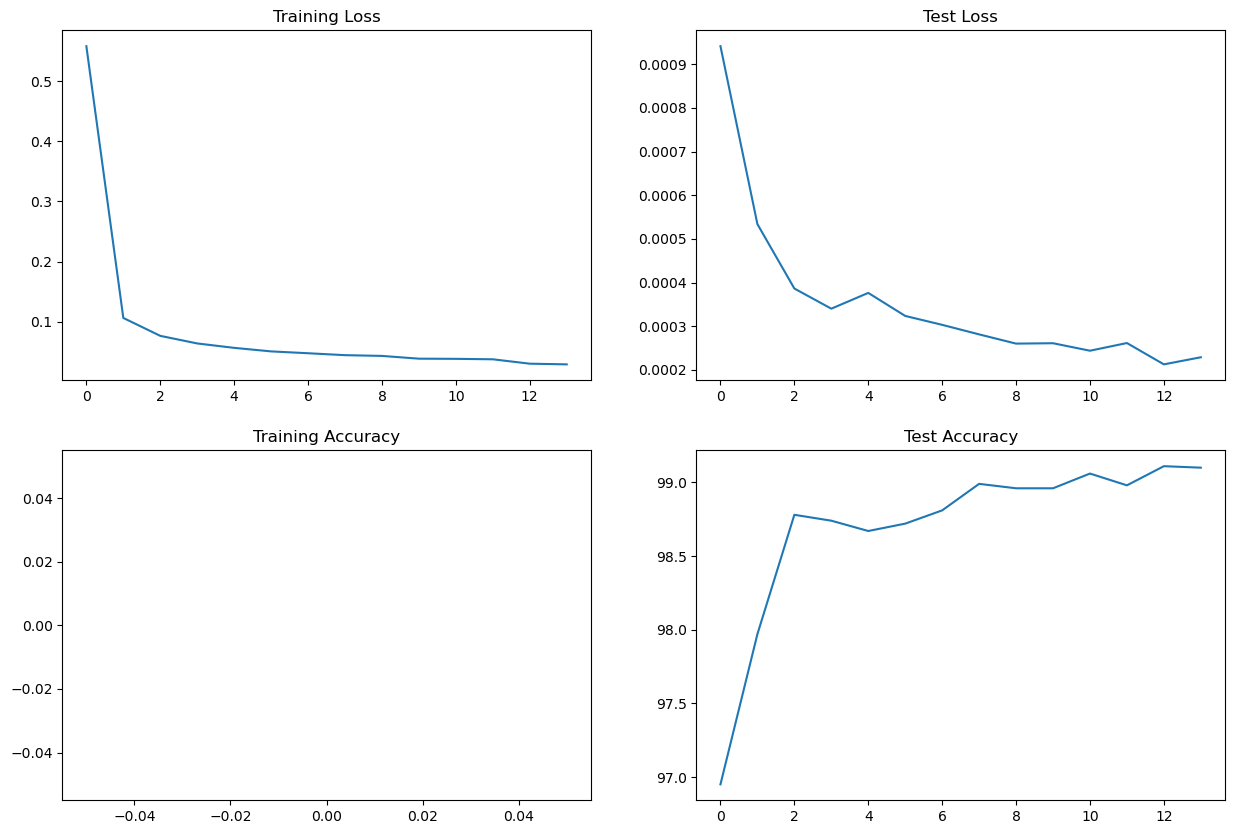

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc[4000:])
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")